In [1]:
import json

cooling_schedules = ["exponential", "bolzmann", "cauchy", "linear", "quadratic", "logarithmic"]

cooling_schedule_data = {}
for cooling_schedule in cooling_schedules:
    with open(f'statistics/{cooling_schedule}_cooling_schedule_test.json', 'r') as file:
        data = json.load(file)
        cooling_schedule_data[cooling_schedule] = data

In [2]:
import numpy as np
import pandas as pd

mean_initial_solutions = []
mean_best_solutions = []
mean_times = []
parameters_kinds = []
cooling_schedule_kinds = []

for cooling_schedule in cooling_schedules:
    for parameters, results in cooling_schedule_data[cooling_schedule].items():
        mean_initial = sum([result['initial_cost'] for result in results])/len(results)
        mean_best = sum([result['best_cost'] for result in results])/len(results)
        mean_time = sum([result['elapsed_time'] for result in results])/len(results)
        mean_best_solutions.append(mean_best)
        mean_times.append(mean_time)
        parameters_kinds.append(str(parameters))
        cooling_schedule_kinds.append(cooling_schedule)
        mean_initial_solutions.append(mean_initial)

columns = ['parameters', 'cooling_schedule', 'initial_cost', 'best_cost', 'elapsed_time']
df = pd.DataFrame(np.array([parameters_kinds, cooling_schedule_kinds,mean_initial_solutions, mean_best_solutions, mean_times]).T, columns=columns)

df['initial_cost'] = df['initial_cost'].astype('float')
df['best_cost'] = df['best_cost'].astype('float')
df['elapsed_time'] = df['elapsed_time'].astype('float')
df['cost_diff'] = df['initial_cost'] - df['best_cost']

df.head()

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
0,"(25, 2.03, 30, 0.995)",exponential,1919.688,1542.560,7.375794,377.128
1,"(25, 0.166, 30, 0.995)",exponential,1949.472,1414.120,14.097796,535.352
2,"(30, 0.00133, 30, 0.995)",exponential,1951.928,1466.984,29.414994,484.944
3,"(50, 6.93, 20, 1)",bolzmann,1962.608,1692.744,7.525560,269.864
4,"(50, 6.32, 20, 1)",bolzmann,1968.208,1528.424,14.816520,439.784


In [3]:
means_by_cooling_schedule = df.groupby('cooling_schedule').mean()
means_by_cooling_schedule.head()

,initial_cost,best_cost,elapsed_time,cost_diff
cooling_schedule,,,,
bolzmann,1947.888000,1554.672000,17.610027,393.216000
cauchy,1946.826667,1575.728000,18.172561,371.098667
exponential,1940.362667,1474.554667,16.962861,465.808000
linear,1928.656000,1416.648000,25.248820,512.008000
logarithmic,1952.144000,1329.458667,15.806120,622.685333


Text(0.5, 1.0, 'Wykres minimalnej wartości funkcji celu w zależności od schematu chłodzenia')

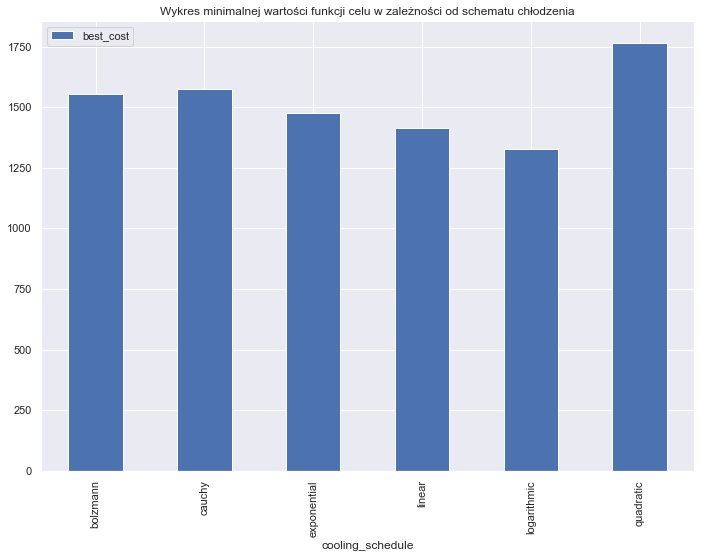

In [4]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
means_by_cooling_schedule.plot(y='best_cost', kind='bar').set_title('Wykres minimalnej wartości funkcji celu w zależności od schematu chłodzenia')

Text(0.5, 1.0, 'Wykres zmiany wartości funkcji celu w zależności od schematu chłodzenia')

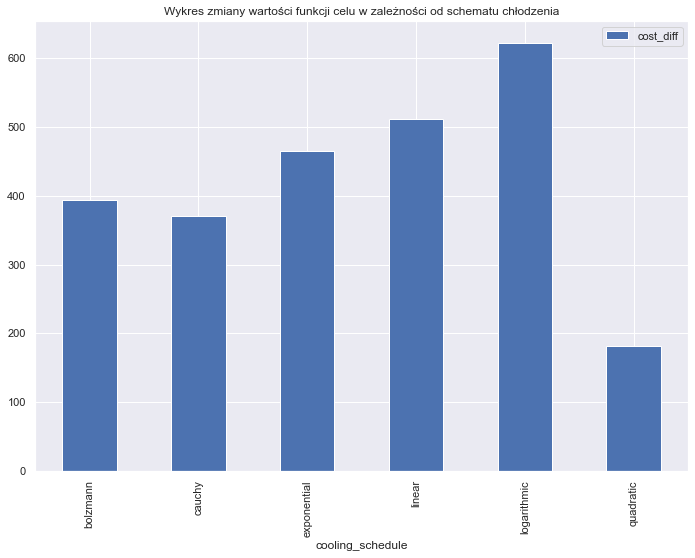

In [5]:
means_by_cooling_schedule.plot(y='cost_diff', kind='bar').set_title('Wykres zmiany wartości funkcji celu w zależności od schematu chłodzenia')

Text(0.5, 1.0, 'Wykres czasu wyznaczania rozwiązania końcowego w zależności od schematu chłodzenia')

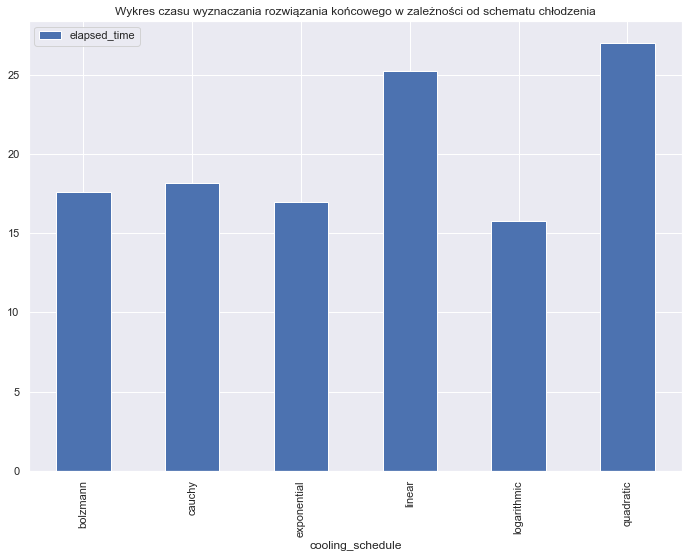

In [6]:
means_by_cooling_schedule.plot(y='elapsed_time', kind='bar').set_title('Wykres czasu wyznaczania rozwiązania końcowego w zależności od schematu chłodzenia')

In [7]:
df.sort_values('elapsed_time', ascending=False)

,parameters,cooling_schedule,initial_cost,best_cost,elapsed_time,cost_diff
14,"(1000, 0.004, 1, 0.06)",quadratic,1937.944,1873.160,53.963640,64.784
11,"(15, 0.15, 100, 0.005)",linear,1904.808,1440.976,44.256101,463.832
8,"(50, 0.025, 50, 1)",cauchy,1928.536,1551.320,31.944402,377.216
5,"(50, 5.81, 20, 1)",bolzmann,1912.848,1442.848,30.488001,470.000
2,"(30, 0.00133, 30, 0.995)",exponential,1951.928,1466.984,29.414994,484.944
17,"(30, 0.395, 10, 10)",logarithmic,1972.760,1206.832,27.289880,765.928
10,"(15, 0.15, 100, 0.01)",linear,1943.312,1381.648,20.685880,561.664
13,"(1000, 0.004, 1, 0.22)",quadratic,1942.144,1728.616,19.241840,213.528
7,"(50, 0.05, 40, 1)",cauchy,1951.512,1488.744,14.961600,462.768
4,"(50, 6.32, 20, 1)",bolzmann,1968.208,1528.424,14.816520,439.784


In [11]:
df.groupby('cooling_schedule').max(['cost_diff', 'best_cost'])

,initial_cost,best_cost,elapsed_time,cost_diff
cooling_schedule,,,,
bolzmann,1968.208,1692.744,30.488001,470.000
cauchy,1960.432,1687.120,31.944402,462.768
exponential,1951.928,1542.560,29.414994,535.352
linear,1943.312,1440.976,44.256101,561.664
logarithmic,1972.760,1470.488,27.289880,765.928
quadratic,1966.832,1873.160,53.963640,267.880
